# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# 1️⃣ Předzpracování dat

Import balíčků

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, ParameterGrid
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            154
percentage expenditure               0
Hepatitis B                        530
Measles                              0
BMI                                 26
under-five deaths                    0
Polio                               18
Total expenditure                  189
Diphtheria                          18
HIV/AIDS                             0
GDP                                401
Population                         602
thinness  1-19 years                26
thinness 5-9 years                  26
Income composition of resources    142
Schooling                          142
dtype: int64

Vidíme, že příznaky `Alcohol`, `Hepatitis B`, `BMI`, `Polio`, `Total expenditure`, `Diphtheria`, `GDP`, `Population`, `thinness  1-19 years`, `thinness 5-9 years`, `Income composition of resources`, `Schooling` mají chybějící hodnoty, doplníme je.

Než tak uděláme, přeložíme si příznaky `Country` a `Status` z typu Object na typ numerický.
`Country` zakódujeme jako jedinečný klíč záznamu a `Status` zakódujeme binárně, protože má pouze dvě hodnoty.

In [4]:
from sklearn.preprocessing import LabelEncoder

mapping = {'Developed': 1, 'Developing': 0}
df['Status_encoded'] = df['Status'].map(mapping)

label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])
df.set_index('Country_encoded', inplace=True)

df.drop('Country', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2718 entries, 0 to 182
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2718 non-null   int64  
 1   Life expectancy                  2718 non-null   float64
 2   Adult Mortality                  2718 non-null   float64
 3   infant deaths                    2718 non-null   int64  
 4   Alcohol                          2564 non-null   float64
 5   percentage expenditure           2718 non-null   float64
 6   Hepatitis B                      2188 non-null   float64
 7   Measles                          2718 non-null   int64  
 8   BMI                              2692 non-null   float64
 9   under-five deaths                2718 non-null   int64  
 10  Polio                            2700 non-null   float64
 11  Total expenditure                2529 non-null   float64
 12  Diphtheria           

Nyní se budeme zabývat chybějícími hodnotami, ale ještě předtím rozdělíme dataset na podmnožiny, aby se předešlo úniku informací z testovací nebo validační množiny do trénovací množiny(60 % trénovací, 20 % validační a 20 % testovací).

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=322)

display(Xtrain.shape)
display(ytrain.shape)

Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=322)

display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(1630, 20)

(1630,)

(544, 20)

(544,)

(544, 20)

(544,)

Nyní na základě množiny Xtrain doplníme chybějící hodnoty ve všech množinách pomocí mediánu.

In [6]:
medians = Xtrain.median()

Xtrain.fillna(medians, inplace=True)
Xval.fillna(medians, inplace=True)
Xtest.fillna(medians, inplace=True)

Xtrain.isnull().sum().sum(), Xval.isnull().sum().sum(), Xtest.isnull().sum().sum()

(0, 0, 0)

Použil jsem celkový medián, nikoli medián pro jednotlivé země, protože pokud je počet záznamů pro některé země v datasetu malý, to může vést k nesprávným nebo zkresleným statistikám.

Možná bude potřeba ještě připravit data pro jednotlivé modely, to udělám později.

# 2️⃣Vlastní implementaci náhodného lesa

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators= 20, max_samples=0.5, max_depth=None, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.trees = [DecisionTreeRegressor(max_depth=max_depth, **kwargs) for _ in range(n_estimators)]
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        n_samples = X.shape[0]
        if isinstance(self.max_samples, float):
            max_samples = int(self.max_samples * n_samples)
        else:
            max_samples = self.max_samples
        # prohledávání všech stromů
        for tree in self.trees:
            sampled_X, sampled_y = resample(X, y, n_samples=max_samples)
            tree.fit(sampled_X, sampled_y)
        return self
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        for tree in self.trees:
            ypredicted += tree.predict(X)
        #průměrování hodnot 
        ypredicted /= self.n_estimators
        return ypredicted


# 3️⃣Aplikace modelů

## 1️⃣ Náhodný les

#### Vhodnost daného modelu pro daný typ úlohy:

**Komplexní Vztahy mezi Příznaky:** Naše data obsahují mnoho různých typů příznaků, jako jsou zdravotní ukazatele, socioekonomické faktory a životní podmínky. Náhodný les je schopen identifikovat a využít jejich komplexní vzájemné vztahy s cílovou proměnnou.

**Prevence Přetrénování:** S tak rozsáhlým a detailním datasetem, jako je náš, existuje riziko přetrénování modelu. Náhodný les přirozeně snižuje toto riziko díky metodám bagging a náhodného výběru příznaků při vytváření jednotlivých stromů.

Rozhodl jsem se nepoužívat standardizaci nebo minmax, protože náhodný les dobře vyhodnocuje důležitost příznaků tak, jak jsou, a normalizace nebo standardizace by mohla tuto interpretaci zkreslit.

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
param_grid = {
    'n_estimators': range(5, 40, 5),
    'max_depth': range(1, 8),
    'max_samples': [0.5, 0.7, 0.9]
}

param_comb = ParameterGrid(param_grid)

val_metric_rmse = []
val_metric_mae = []

for params in param_comb:
    model = CustomRandomForest(**params)
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xval)
    val_metric_rmse.append(mean_squared_error(yval, y_pred, squared=False))
    val_metric_mae.append(mean_absolute_error(yval, y_pred))

best_params = param_comb[np.argmin(val_metric_rmse)]
best_rmse = min(val_metric_rmse)
best_mae = val_metric_mae[np.argmin(val_metric_rmse)]

print(f"The best params: {best_params} with validation RMSE: {best_rmse:.2f} and MAE: {best_mae:.2f}.")

The best params: {'n_estimators': 35, 'max_samples': 0.9, 'max_depth': 7} with validation RMSE: 2.13 and MAE: 1.44.


Vysledky ukazujou, že model s těmito nastaveními dosahuje průměrné odchylky předpovědí od skutečných hodnot o 2 roky, což je v kontextu predikce délky dožití považováno za dobře výkonný model.`Spoiler:`Tento model ukázal nejlepší výsledek, takže jsem započítal i MAE.Nízká hodnota MAE znamená, že průměrná absolutní chyba mezi předpověděnými a skutečnými hodnotami je pouze 1.46 roku, což ukazuje na vysokou schopnost modelu přesně předpovídat cílovou proměnnou.

Vizualizace výsledků pro model s nejlepšími hyperparametry

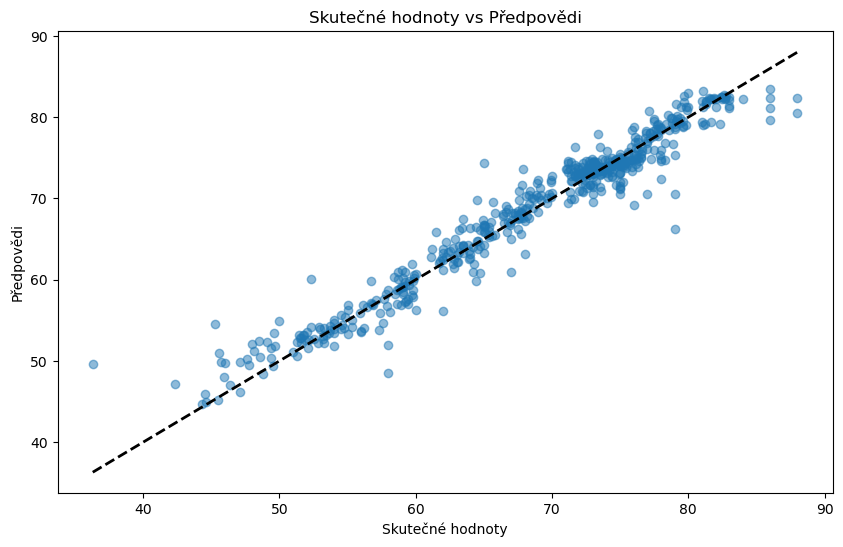

In [9]:
best_model = CustomRandomForest(n_estimators=35, max_samples=0.9, max_depth=7)
best_model.fit(Xtrain, ytrain)
predictions = best_model.predict(Xval)

plt.figure(figsize=(10, 6))
plt.scatter(yval, predictions, alpha=0.5)
plt.plot([yval.min(), yval.max()], [yval.min(), yval.max()], 'k--', lw=2)
plt.xlabel('Skutečné hodnoty')
plt.ylabel('Předpovědi')
plt.title('Skutečné hodnoty vs Předpovědi')
plt.show()

Na základě vizualizace můžeme říci, že model náhodného lesa předpovídá délku života s poměrně dobrým stupněm přesnosti. Většina bodů je blízko ideální čáry, což naznačuje, že skutečné hodnoty a předpovědi se v mnoha případech shodují.

## 2️⃣ Hřebenová regrese

#### Vhodnost daného modelu pro daný typ úlohy:

**Stabilizace Odhadů**: V případě, že některé příznaky jsou mezi sebou silně korelované, hřebenová regrese může stabilizovat odhady tím, že "trestá" velké koeficienty, což je důležité pro získání spolehlivých predikcí.

**Prevence Přetrénování**: Vzhledem k tomu, že délka dožití může být ovlivněna širokou škálou faktorů, model s regulací, jako je hřebenová regrese, může předcházet přetrénování, které by se mohlo vyskytnout u modelů bez regulace

Pro hřebenovou regresi se doporučuje **standardizace**. Důvodem je, že hřebenová regrese zahrnuje penalizaci koeficientů a velikost této penalizace je závislá na měřítku proměnných. Standardizace zajistí, že penalizace bude aplikována rovnoměrně na všechny proměnné.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Xtrain_scaled = scaler.fit_transform(Xtrain)

Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

Pro zjednodušení budu používat RidgeCV

In [11]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from math import sqrt

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5)
ridge_model.fit(Xtrain_scaled, ytrain)
ridge_predictions = ridge_model.predict(Xval_scaled)
ridge_rmse = sqrt(mean_squared_error(yval, ridge_predictions))

best_alpha = ridge_model.alpha_
print(f"Best alpha for Ridge Regression: {best_alpha}")
print(f"Validation RMSE for Ridge Regression: {ridge_rmse:.2f}")

Best alpha for Ridge Regression: 0.1
Validation RMSE for Ridge Regression: 4.16


Nízká hodnota **alpha**, jako je 0.1, umožňuje koeficientům být relativně velkými, což přibližuje model k obyčejné lineární regresi. Model s takto nastavenou mírou regulace dosahuje průměrné chyby předpovědi přibližně 4.16 let, což je v kontextu predikce délky dožití poměrně vysoká hodnota.

## 3️⃣ Vybraný model: LASSO

#### Vhodnost daného modelu pro daný typ úlohy:

**Redukce Rozměrnosti**:Pokud máme v datasetu velké množství příznaků, LASSO může pomoci v redukci rozměrnosti tím, že některé koeficienty zredukuje přímo na nulu, což znamená vyloučení některých příznaků z modelu.

**Prevence Přetrénování**:Díky regulaci, kterou LASSO poskytuje, je model méně náchylný k přetrénování

**Výběr Důležitých Příznaků**: LASSO může být efektivní v identifikaci důležitých příznaků

Pro model LASSO se obvykle doporučuje **standardizace** příznaků, zejména při práci s reálnými daty, jako v našem případě s problémem předpovědi délky života. LASSO penalizuje absolutní hodnoty koeficientů modelu. Bez standardizace by proměnné s většími rozsahy mohly být nespravedlivě penalizovány, což může vést k nesprávné selekci proměnných.

Pro zjednodušení budu používat LassoCV

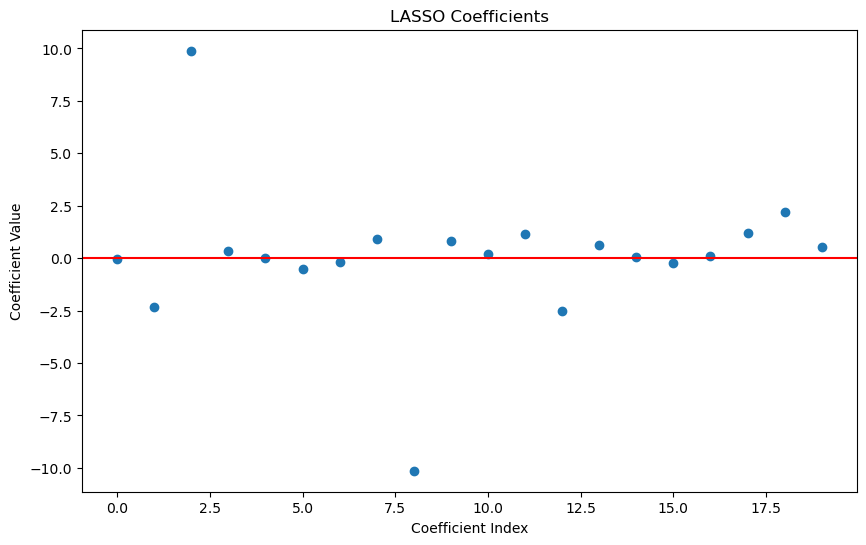

Best alpha for LASSO: 0.00689
Validation RMSE for LASSO: 4.17


In [12]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

lasso_model = LassoCV(cv=5, max_iter=10000)

lasso_model.fit(Xtrain_scaled, ytrain)

lasso_predictions = lasso_model.predict(Xval_scaled)

lasso_rmse = sqrt(mean_squared_error(yval, lasso_predictions))

best_alpha = lasso_model.alpha_

plt.figure(figsize=(10, 6))
plt.plot(lasso_model.coef_, marker='o', linestyle='none')
plt.title('LASSO Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

print(f"Best alpha for LASSO: {best_alpha:.5f}")
print(f"Validation RMSE for LASSO: {lasso_rmse:.2f}")

Můžeme usoudit, že výkon modelu není zcela uspokojivý pro účely predikce délky dožití. RMSE ve výši 4.17 let naznačuje, že model má relativně velkou průměrnou chybu v predikcích

# 4️⃣Vyhodnocovací data

Jako nejlepší model jsem si vybral **`náhodný les`**, protože jeho RMSE bylo nejnižší. Předpokládám, že při použití tohoto modelu na nových datech bude mít RMSE přibližně stejnou hodnotu, jakou měl na validační množině, tedy kolem 2

Připravíme nové data:

In [13]:
evaluation_data = pd.read_csv('evaluation.csv')
evaluation_data.isnull().sum()

Country                             0
Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0
Alcohol                            39
percentage expenditure              0
Hepatitis B                        23
Measles                             0
BMI                                 6
under-five deaths                   0
Polio                               1
Total expenditure                  37
Diphtheria                          1
HIV/AIDS                            0
GDP                                42
Population                         42
thinness  1-19 years                6
thinness 5-9 years                  6
Income composition of resources    18
Schooling                          18
dtype: int64

Zopakujme kroky, které jsme provedli s původním souborem dat, ale uložme sloupec `Country` pro výsledky.

In [14]:
countries = evaluation_data['Country']

evaluation_data.drop(columns=['Country'], inplace=True)

mapping = {'Developed': 1, 'Developing': 0}
evaluation_data['Status_encoded'] = evaluation_data['Status'].map(mapping)
evaluation_data.drop('Status', axis=1, inplace=True)

columns_to_fill = ['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 
                   'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 
                   'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for column in columns_to_fill:
    median_value = evaluation_data[column].median()
    evaluation_data[column].fillna(median_value, inplace=True)
    
evaluation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             210 non-null    int64  
 1   Adult Mortality                  210 non-null    float64
 2   infant deaths                    210 non-null    int64  
 3   Alcohol                          210 non-null    float64
 4   percentage expenditure           210 non-null    float64
 5   Hepatitis B                      210 non-null    float64
 6   Measles                          210 non-null    int64  
 7   BMI                              210 non-null    float64
 8   under-five deaths                210 non-null    int64  
 9   Polio                            210 non-null    float64
 10  Total expenditure                210 non-null    float64
 11  Diphtheria                       210 non-null    float64
 12  HIV/AIDS              

Nyní použijeme náš model s již dříve nastavenými hyperparametry.

In [15]:
model = CustomRandomForest(**best_params)
model.fit(Xtrain, ytrain)
predicted_life_expectancy = model.predict(evaluation_data)

results = pd.DataFrame({
    'Country': countries,
    'Year': evaluation_data['Year'],
    'Life expectancy': predicted_life_expectancy
})
results.to_csv('results.csv', index=False)

Výsledek je uložen do souboru results.csv